# **8. 데이터프레임 결합하기**
1. 분석가로서 데이터 결합을 하는 경우
* 기존 데이터에 동일한 구조로 된 행 추가 = 수직결합(combining data vetically) = 이어 붙이기(concatenate)
* 다른 데이터 테이블에서 열을 조회하려고 병합 = 수평결합(combining data horizontally) = **병합(merging)**

2. **병합(merge)**의 종류
* '병합 기준 열 값이 얼마나 중복되는지'에 따라  
     1) 일대일(one-to-one) 병합 : 병합 기준 열 값이 각 데이터 테이블에 한 번씩 나타남  
     2) 일대다(one-to-many) 병합 : 한 쪽에는 중복되지 않은 병합 기준 열 값 존재, 다른 쪽에는 중복된 병합 기준 열 값 존재  
     3) 다대다(many-to-many) 병합 : 양쪽 모두에 병합 기준 열 값이 중복됨 

3. 데이터 결합에서 발생하는 이슈
- 한 쪽에서 병합 기준 누락되어, 추가되는 쪽 역시 값이 누락되거나 중복되는 문제 등..

## 8.1. 데이터프레임 수직 결합하기


In [70]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.2f}'.format

### (1) 지표온도 데이터 업로드

In [25]:
#🟢 1. 지표온도 데이터 업로드
ltcameroon = pd.read_csv("data/ltcountry/ltcameroon.csv")
ltpoland = pd.read_csv("data/ltcountry/ltpoland.csv")

### (2) 데이터 이어붙이기 : 2개 파일

In [26]:
ltcameroon.shape

(48, 11)

In [27]:
ltpoland.shape

(120, 11)

In [28]:
#🟢 2. 데이터 이어붙이기(concatenate) : Cameroon - Poland data
ltall = pd.concat([ltcameroon, ltpoland])
ltall.country.value_counts()

Poland      120
Cameroon     48
Name: country, dtype: int64

### (3) 데이터 이어붙이기 : 모든 파일

In [76]:
# ltoman 데이터프레임에는 latabs(관측소의 위도 절댓값 : latitude absolute value)컬럼 없음
ltoman = pd.read_csv('data/ltcountry/ltoman.csv')
ltoman.sample(3, random_state=1)

,locationid,year,month,temperature,latitude,longitude,elevation,station,countryid,country
264,MU000041254,2019,12,NaN,23.07,57.63,"1,755.00",SAIQ,MU,Oman
246,MUM00041252,2019,11,24.50,23.23,56.43,327.00,IBRI,MU,Oman
185,MUM00041268,2019,8,34.40,22.53,59.48,14.00,SUR,MU,Oman


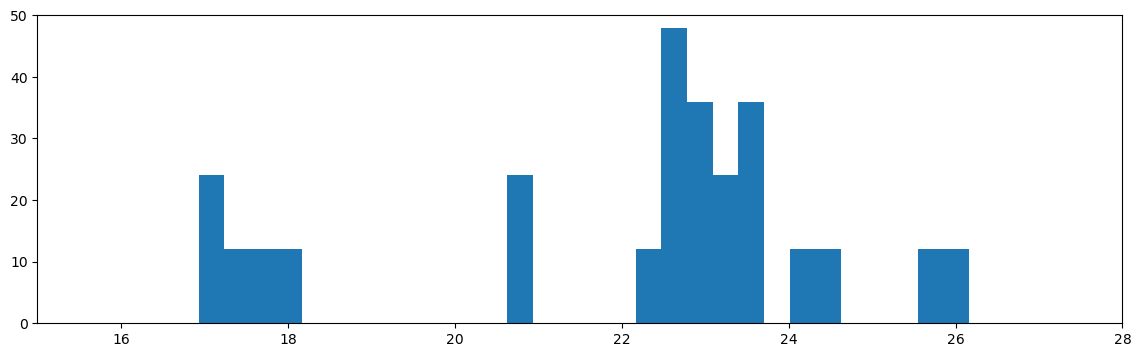

In [75]:
ltlist = list(ltoman.latitude)

import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.rcParams["figure.figsize"] = (14,4)

plt.hist(ltlist, bins=30)
plt.axis([15, 28, 0, 50])
plt.show()

In [77]:
# 그 외 데이터프레임에는 latabs 컬럼이 존재함을 확인
ltall.sample(3, random_state=1)

,locationid,year,month,temperature,latitude,longitude,elevation,station,countryid,country,latabs
717,BRM00083235,2019,8,27.75,-12.40,-46.43,604.00,TAGUATINGA,BR,Brazil,12.40
649,JA000047618,2019,5,17.25,36.25,137.97,611.00,MATSUMOTO,JA,Japan,36.25
172,MUM00041244,2019,8,37.40,24.23,55.78,299.00,BURAIMI_AUT,MU,Oman,NaN


In [29]:
#🟢 3. 데이터 이어붙이기 (concatenate) : 모든 국가별 파일의 데이터 
directory = "data/ltcountry"
ltall = pd.DataFrame()

for filename in os.listdir(directory):
    # 디렉토리 내의 파일을 하나씩 루핑하는데
    if filename.endswith(".csv"): 
        # 그 중 csv 확장자인 파일인 것만
        fileloc = os.path.join(directory, filename)
        # 경로를 생성한 뒤에
        
        # 파일을 연다
        with open(fileloc) as f:
            ltnew = pd.read_csv(fileloc)
            print(filename + " has " + str(ltnew.shape[0]) + " rows.")
            ltall = pd.concat([ltall, ltnew])
            
        # 칼럼에 차이가 있는지 확인한다
        columndiff = ltall.columns.symmetric_difference(ltnew.columns)
        if (not columndiff.empty):
            print("", "Different column names for:", filename, columndiff, "", sep="\n")

ltbrazil.csv has 1104 rows.
ltcameroon.csv has 48 rows.
ltindia.csv has 1056 rows.
ltjapan.csv has 1800 rows.
ltmexico.csv has 852 rows.
ltoman.csv has 288 rows.

Different column names for:
ltoman.csv
Index(['latabs'], dtype='object')

ltpoland.csv has 120 rows.


* 3번 코드 부연설명
    - 특정 폴더에 있는 모든 csv 파일 찾고 > 찾아낸 파일을 각각 메모리에 로딩 > 각 파일의 행을 데이터프레임에 추가
    - 폴더 내 파일 전체에 대해 '파일명'으로 루핑(looping)
    - 파일 확장자 csv여부를 `endwith`으로 확인
    - 특정 경로에 존재하는 파일과 디렉터리 목록을 구하는 함수 사용 `listdir`
        - 특히 `listdir` 함수의 인자로 경로를 전달하면, 해당 경로 내 존재하는 파일과 디렉터리 목록을 list 형태로 구할 수 있음
        > 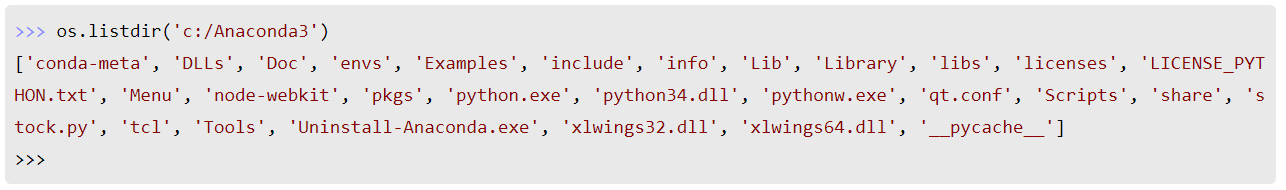
        - 특정 경로내 특정 확장자 파일만 검색하는 예시
        > 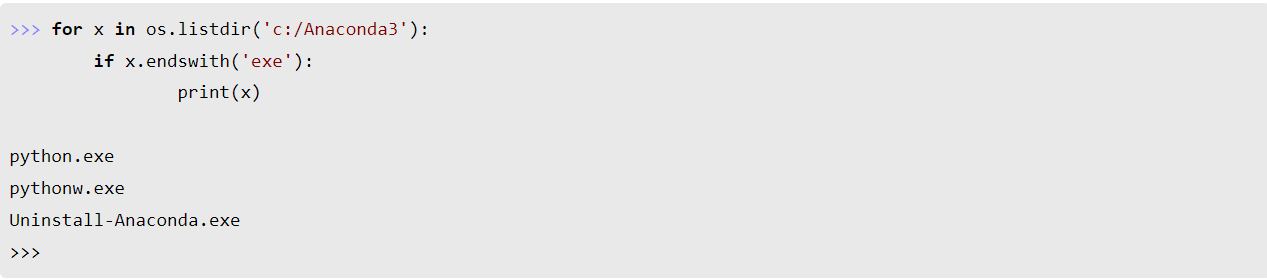
    - `os` 즉, Operating System 모듈은 운영체제에서 제공되는 다양한 기능을 파이썬에서 수행 가능하게 하는 모듈임 
        - `os.path.join` 함수로 경로명을 조작/처리함 : 인수에 전달한 2개의 문자열 결합하여 > 1개의 경로로 사용  
        > (1) 경로와 파일명을 결합하거나 (2) 분할된 경로를 하나로 정리하는데 사용 
    - `open` 사용하여 파일 읽기/닫기
        > with문을 사용하면, with 블록 벗어나는 순간 열린 파일 객체 f가 자동으로 close되어서 편리, 파일 닫는 코드 작성을 잊는 문제를 방지함 `with open(파일명, 파일열기모드, ...) as 파일객체:`
    - `symmetric difference` 대칭차집합을 활용하여, 컬럼명 간에 차이가 있는지 확인함 
        > 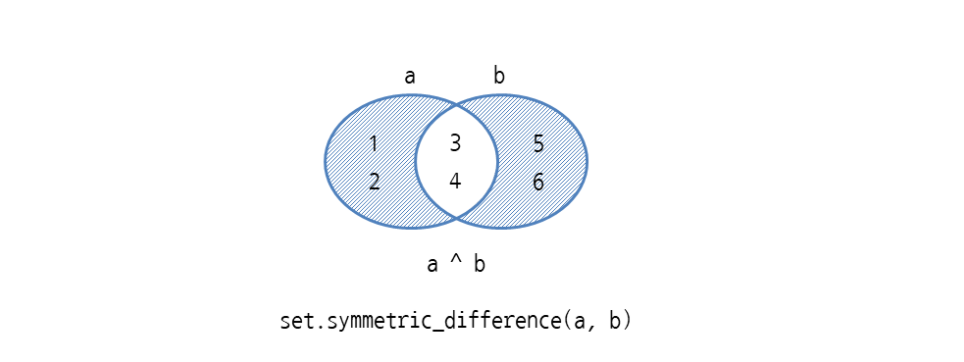

In [30]:
# 예시. open으로 파일 여닫기
directory = os.getcwd() # 파일 경로
fileloc = os.path.join(directory, 'test.txt') # 파일 경로 + 파일명 결합 > 하나의 경로(path)로 만들기
f = open(fileloc, 'r', encoding='utf-8') # 파일 열기 (한글이 있을 땐 'utf-8'로 인코딩)
df = f.read() # 파일 읽기
print(df)
f.close() # 파일 닫기

# 3-2. open + with으로 파일여닫기 : close 안해줘도 됨 !
with open(fileloc, 'r', encoding='utf-8') as f:
    df = f.read()
    print(df)

test check
test check


* **기타 메모**
    - 애스터리스크(*) 활용하기 : 리스트나 튜플 전개에도 사용됨
    - `os.getcwd`  현재 작업 경로 확인

In [31]:
# 1-1. 애스터리스크(*) 예시 1
[5] * 2

[5, 5]

In [32]:
# 1-2. 애스터리스크(*) 예시 2
list_path = ['C:\\', 'Users', 'user'] 
# 세 번째 인자 앞에서부터 백슬래시가 자동으로 붙음 (첫번재-두번째 사이는 직접 입력해주어야 함)
folder_path = os.path.join(*list_path)
folder_path

'C:\\Users\\user'

In [33]:
# 2. 현재 작업경로 확인하기
print(os.getcwd())

C:\Users\hwkim\Downloads\python-main\python-main


### (4) 결합 데이터 일부 표시

In [34]:
#🟢 4. 결합된 데이터 일부 표시
ltall[['country','station','month','temperature','latitude']].sample(5, random_state=1)

,country,station,month,temperature,latitude
717,Brazil,TAGUATINGA,8,28,-12
649,Japan,MATSUMOTO,5,17,36
172,Oman,BURAIMI_AUT,8,37,24
1029,India,JAIPUR_SANGANER,12,15,27
351,Mexico,SN_CRISTOBAL_LAS_CASASCHIS,5,19,17


### (5) 이어붙인 데이터 값 검사

**참고**  
- `empty` 함수 : 메모리 할당만 받고, 초기화없이 반환함.   
    cf) `zeros` 함수는 메모리를 할당받아, 0으로 초기화한 후에 반환해주는 메소드임

In [35]:
np.empty(shape=(10,), dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [36]:
#🟢 5. 이어붙인 데이터 값 검사
ltall.country.value_counts().sort_index()

Brazil      1104
Cameroon      48
India       1056
Japan       1800
Mexico       852
Oman         288
Poland       120
Name: country, dtype: int64

In [37]:
ltall.groupby(['country']).agg({'temperature':['min','mean','max','count'],\
                                'latabs':['min','mean','max','count']})

temperature                latabs               
                 min mean max count    min mean max count
country                                                  
Brazil            12   25  34   969      0   14  34  1104
Cameroon          22   27  36    34      4    8  10    48
India              2   26  37  1044      8   21  34  1056
Japan             -7   15  30  1797     24   36  45  1800
Mexico             7   23  34   806     15   22  32   852
Oman              12   28  38   205    NaN  NaN NaN     0
Poland            -4   10  23   120     50   52  55   120

### (6) 누락값 수정

In [10]:
#🟢 6. 누락값 수정
ltall['latabs'] = np.where(ltall.country=="Oman", ltall.latitude, ltall.latabs)
# np.where 복습 ) np.where(a>10, a, 10) => a가 10보다 크면 그대로 사용하고, 그렇지 않으면 10으로 바꾸겠다

# 누락값 수정 이후 값 변화를 확인할 수 있다 - Oman의 latabs 
ltall.groupby(['country']).agg({'temperature':['min','mean','max','count'],\
                                'latabs':['min','mean','max','count']})

temperature                latabs               
                 min mean max count    min mean max count
country                                                  
Brazil            12   25  34   969      0   14  34  1104
Cameroon          22   27  36    34      4    8  10    48
India              2   26  37  1044      8   21  34  1056
Japan             -7   15  30  1797     24   36  45  1800
Mexico             7   23  34   806     15   22  32   852
Oman              12   28  38   205     17   22  26   288
Poland            -4   10  23   120     50   52  55   120

In [83]:
ltall.loc[ltall.country=="Oman",'latitude']

0     23.07
1     20.67
2     26.17
3     25.62
4     24.23
       ... 
283   18.13
284   16.93
285   17.67
286   17.25
287   17.04
Name: latitude, Length: 288, dtype: float64